<a href="https://colab.research.google.com/github/Onehundredpunches/Five-model-in-first-report/blob/main/Predict_friend_face_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# Import library
import pandas as pd
import numpy as np
from os import listdir
from numpy import asanyarray, save
from keras.utils import load_img, img_to_array
from numpy.core.multiarray import asarray
from google.colab import drive
from keras.utils import to_categorical
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [44]:
folder = '/content/drive/MyDrive/AI Report Photo/face Images/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('Cuong'):
    output = 1.0
  if file.startswith('Tuan'):
    output = 2.0
  if file.startswith('Tan'):
    output = 3.0
  if file.startswith('Phat'):
    output = 4.0
  if file.startswith('Thanh'):
    output = 5.0  
  if file.startswith('Dat'):
    output = 6.0 
  photo = load_img(folder+file, target_size = (30,40))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

(425, 30, 40, 3) (425,)


In [45]:
# Save data 
save('/content/drive/MyDrive/Colaboratory/AI REPORT/face/Friend_Face_photos.npy', photos)
save('/content/drive/MyDrive/Colaboratory/AI REPORT/face/Friend_Face_labels.npy', labels)

In [46]:
# Load data
photos = np.load('/content/drive/MyDrive/Colaboratory/AI REPORT/face/Friend_Face_photos.npy')
labels = np.load('/content/drive/MyDrive/Colaboratory/AI REPORT/face/Friend_Face_labels.npy')

In [47]:
X_train, X_test, y_train, y_test = train_test_split(photos, labels, test_size=0.1, random_state=3)

In [48]:
X_train.shape

(382, 30, 40, 3)

In [49]:
y_train.shape

(382,)

In [50]:
X_test.shape

(43, 30, 40, 3)

In [51]:
y_test.shape

(43,)

In [52]:
# Standardized data
X_train = X_train.astype('float32')/255
y_train = to_categorical(y_train, 7) 

X_test = X_test.astype('float32')/255
y_test = to_categorical(y_test, 7)

In [53]:
y_train.shape

(382, 7)

In [54]:
y_test.shape

(43, 7)

In [55]:
# Import library
from keras.layers.attention.multi_head_attention import activation
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, normalization, LeakyReLU
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

In [56]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(30, 40, 3), padding='same'))
model.add(Dropout(0.4))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.4))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.4))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(7, activation='softmax'))

In [57]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 40, 32)        896       
                                                                 
 dropout_16 (Dropout)        (None, 30, 40, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 20, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 15, 20, 64)        18496     
                                                                 
 dropout_17 (Dropout)        (None, 15, 20, 64)        0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 8, 10, 64)        0         
 g2D)                                                 

In [58]:
# Compile and Train model
model.compile(loss = categorical_crossentropy,
              optimizer = Adam(),
              metrics = ['accuracy'])
train = model.fit(X_train, y_train, batch_size = 60, epochs = 10, verbose = 1)

Epoch 1/10
7/7 [==============================] - 2s 182ms/step - loss: 1.8836 - accuracy: 0.2225
Epoch 2/10
7/7 [==============================] - 1s 184ms/step - loss: 1.5135 - accuracy: 0.4581
Epoch 3/10
7/7 [==============================] - 1s 187ms/step - loss: 0.8862 - accuracy: 0.6990
Epoch 4/10
7/7 [==============================] - 2s 344ms/step - loss: 0.4726 - accuracy: 0.8665
Epoch 5/10
7/7 [==============================] - 2s 341ms/step - loss: 0.2786 - accuracy: 0.8979
Epoch 6/10
7/7 [==============================] - 1s 183ms/step - loss: 0.1540 - accuracy: 0.9555
Epoch 7/10
7/7 [==============================] - 1s 180ms/step - loss: 0.1380 - accuracy: 0.9607
Epoch 8/10
7/7 [==============================] - 1s 185ms/step - loss: 0.1001 - accuracy: 0.9634
Epoch 9/10
7/7 [==============================] - 1s 185ms/step - loss: 0.1320 - accuracy: 0.9529
Epoch 10/10
7/7 [==============================] - 1s 186ms/step - loss: 0.0655 - accuracy: 0.9843


In [59]:
# Save model
model.save('/content/drive/MyDrive/Colaboratory/AI REPORT/face/Predict_Friends_Face_Model.h5')

Test loss:  0.3177672028541565
Test accuracy 1.0


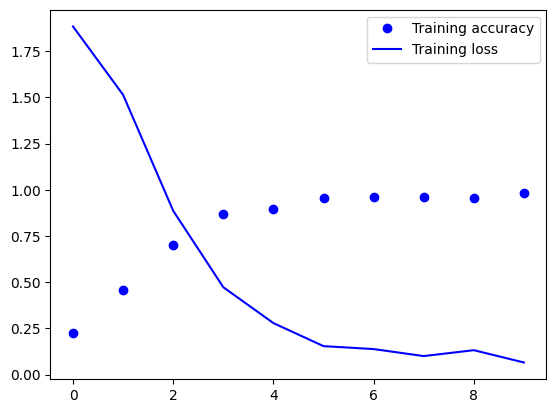

In [60]:
test = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: ', test[0])
print('Test accuracy', test[1])
accuracy=train.history['accuracy']
loss=train.history['loss']
epochs=range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.legend()
plt.show()

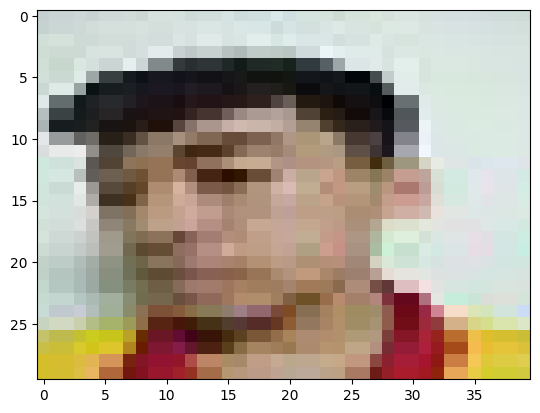

[0. 0. 1. 0. 0. 0. 0.]


In [64]:
# Use testmodel to evalute trainmodel

# Load photo in testmodel
img = X_test[20]
plt.imshow(img)
plt.show()
print(y_test[20])

In [65]:
X_pred = X_test[20].reshape(1,30,40,3)
X_pred=X_pred.astype('float32')/255
np.argmax(model.predict(X_pred), axis=-1)

1/1 [==============================] - 0s 40ms/step


array([0])

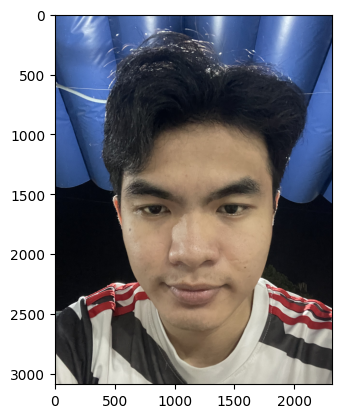

In [66]:
# #IMPORT A PICTURE FOR MODEL PREDICT
url = '/content/IMG_1031.jpg'
img = plt.imread(url) 
plt.imshow(img)
plt.show()

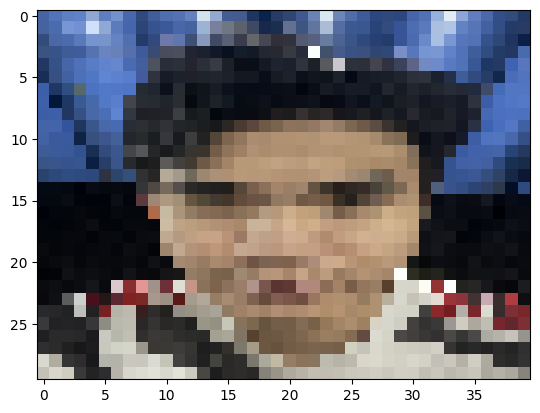

In [67]:
img = load_img(url, target_size = (30,40,3))
plt.imshow(img)

In [68]:
img = img_to_array(img)
img = img.reshape(1,30,40,3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=-1)

1/1 [==============================] - 0s 112ms/step


array([3])